In [1]:
import numpy as np
from scipy import linalg
import math
import matplotlib.pyplot as plt

$u(t)$: 時刻tにおける入力

$W_{in}$: 入力層の重み

$K$: 入力層のノード数

$x(t)$: 時刻tにおけるreservoir層の内部状態

$X$: $x(t)$の行列記法

$W_{res}$: reservoir層の重み

$N$: reservoir層のノード数

$W_{out}$: 出力層の重み

$z(t)$: 出力

$K$: 出力層のノード数

$f$: 活性化関数

$f_{out}$: 活性化関数

reservoirの内部状態の式
$$
x(t) = f((1-\delta)x(t-1) + \delta(W_{in}u(t-1) + W_{res}x(t-1)))
$$
$W_{out}$の学習の式
$$
W_{out} = (X^TX + \lambda I)^{-1}X^TY_{target}
$$
出力の式
$$
z(t) = f^{out}(W_{out}x(t))
$$

In [10]:
K = 1
N = 150
delta = 0.1
f = np.tanh

In [11]:
data = [math.sin(k) for k in [math.radians(i) for i in range(1, 10000, 10)]]

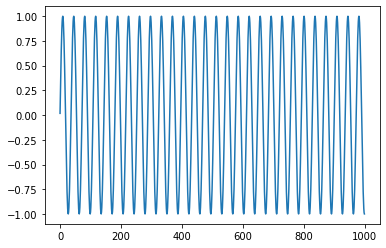

In [12]:
plt.plot(data)

# 個別の関数

In [247]:
# 初期化
Win = (np.random.randint(0, 2, K * N).reshape([K, N]) * 2 - 1) * 0.1 # 0.1か-0.1の行列
Wres = np.random.normal(0, 1, N * N).reshape([N, N])
Wres /= max(abs(linalg.eigvals(Wres))) # 正規分布
Wout = np.zeros([N, K])
x = np.array([np.zeros(N)])

In [250]:
def get_output(Wout, x, f):
    return x[-1] @ Wout

In [246]:
s[-1] @ Wout

array([0., 0.])

In [234]:
Wout.shape

(150, 1)

In [161]:
def update_reservoir_nodes(x, delta, Win, u, Wres, f):
    return f((1 - delta) * x[-1] + delta * (Win * u + Wres @ x[-1]))

In [162]:
def get_all_time_reservoir_nodes(x, delta, Win, u, Wres, f):
    new_x = update_reservoir_nodes(x, delta, Win, u, Wres, f)
    return np.append(x, new_x, axis=0)

In [176]:
def update_Wout(Wout, X, Y, N, lam = 0.1):
    return (np.linalg.inv(X.T @ X + lam * np.eye(N)) @ X.T) @ Y

In [193]:
len(data[:])

997

In [230]:
s = x
for d in data[:-3]:
    s = get_all_time_reservoir_nodes(s, delta, Win, d, Wres, f)
s = s[1:]

In [251]:
Wout = update_Wout(Wout, s, data[1:-2], N, lam = 0.1)

In [252]:
a = update_reservoir_nodes(s, delta, Win, data[-2], Wres, f)
get_output(Wout, a, f)

-0.895183727242919

In [253]:
data[-1]

-0.9998476951563913

# class使う

In [13]:
from reservoir import Reservoir

In [14]:
res = Reservoir(data[:600], K, N, K)

In [15]:
res.train(data[1:601])

In [16]:
pre = res.predict(data[601:])

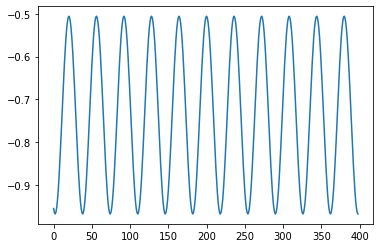

In [17]:
plt.plot(pre)